In [1]:
#https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split


In [2]:
csv_1 = pd.read_csv(r"C:\Users\data science\CICIDS - 30 neurons\with attention and dimensionality reduction\attentionnormalresult.csv") 
  
# changing cols with rename() 
new_data = csv_1.rename(columns = {0: "Feature1",
                                  1: "Feature2", 
                                  2: "Feature3", 
                                  3: "Feature4",
                                  4: "Feature5",
                                  5: "Feature6",
                                  6: "Feature7",
                                  7: "Feature8",
                                  8: "Feature9",
                                  9: "Feature10",
                                  10: "Feature11",
                                  11: "Feature12",
                                  12: "Feature13",
                                  13: "Feature14",
                                  14: "Feature15",
                                  15: "Feature16",
                                  16: "Feature17",
                                  17: "Feature18",
                                  18: "Feature19", 
                                  19: "Feature20",
                                  20: "Feature21",                                   
                                  21: "Feature22",
                                  22: "Feature23",
                                  23: "Feature24",                                   
                                  24: "Feature25",
                                  25: "Feature26",  
                                  26: "Feature27",
                                  27: "Feature28",
                                  28: "Feature29",
                                  29: "Feature30",                                       
                                  30: "Label"}) 
  
# changing columns using .columns() 
csv_1.columns = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 
                'Feature5', 'Feature6', 'Feature7', 'Feature8',
                 'Feature9', 'Feature10', 'Feature11', 'Feature12',
                 'Feature13', 'Feature14', 'Feature15', 'Feature16',
                 'Feature17', 'Feature18', 'Feature19', 'Feature20','Feature21','Feature22','Feature23','Feature24','Feature25','Feature26','Feature27','Feature28','Feature29','Feature30',"Label"] 


csv_1.to_csv("attentionnormalresult.csv", index=None)

In [3]:
csv_2 = pd.read_csv(r"C:\Users\data science\CICIDS - 30 neurons\25% attack\attentionabnormalresult.csv") 
  
# changing cols with rename() 
new_data = csv_2.rename(columns = {0: "Feature1",
                                  1: "Feature2", 
                                  2: "Feature3", 
                                  3: "Feature4",
                                  4: "Feature5",
                                  5: "Feature6",
                                  6: "Feature7",
                                  7: "Feature8",
                                  8: "Feature9",
                                  9: "Feature10",
                                  10: "Feature11",
                                  11: "Feature12",
                                  12: "Feature13",
                                  13: "Feature14",
                                  14: "Feature15",
                                  15: "Feature16",
                                  16: "Feature17",
                                  17: "Feature18",
                                  18: "Feature19", 
                                  19: "Feature20",
                                  20: "Feature21",                                   
                                  21: "Feature22",
                                  22: "Feature23",
                                  23: "Feature24",                                   
                                  24: "Feature25",
                                  25: "Feature26",  
                                  26: "Feature27",
                                  27: "Feature28",
                                  28: "Feature29",
                                  29: "Feature30",                                         
                                  30: "Label"}) 
  
# changing columns using .columns() 
csv_2.columns = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 
                'Feature5', 'Feature6', 'Feature7', 'Feature8',
                 'Feature9', 'Feature10', 'Feature11', 'Feature12',
                 'Feature13', 'Feature14', 'Feature15', 'Feature16',
                 'Feature17', 'Feature18', 'Feature19', 'Feature20','Feature21','Feature22','Feature23','Feature24','Feature25','Feature26','Feature27','Feature28','Feature29','Feature30',"Label"] 

  

csv_2.to_csv("attentionabnormalresult.csv", index=None)

In [4]:
merged = csv_1.merge(csv_2,on="Label")

merged.to_csv("attention1.csv", index=False)
#result = pd.concat([csv_1, csv_2], axis=1)
out = csv_1.append(csv_2)
print(out)
out.to_csv("attention1.csv", index=False)

        Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  Feature7  \
0       0.031837  0.031837  0.031837  0.031837  0.036238  0.039322  0.031837   
1       0.035108  0.032130  0.032130  0.032130  0.032130  0.032130  0.038547   
2       0.031934  0.041154  0.031934  0.031934  0.039751  0.031934  0.036542   
3       0.031406  0.032686  0.031092  0.033183  0.037234  0.036711  0.030824   
4       0.031504  0.031599  0.031504  0.032908  0.037345  0.037925  0.031504   
...          ...       ...       ...       ...       ...       ...       ...   
139133  0.031579  0.033514  0.031579  0.031579  0.031579  0.031579  0.035344   
139134  0.033201  0.035775  0.031339  0.033699  0.031339  0.031339  0.031339   
139135  0.036865  0.040068  0.031291  0.031291  0.040199  0.031291  0.037711   
139136  0.031144  0.031144  0.031144  0.031144  0.047346  0.032476  0.035666   
139137  0.033141  0.035668  0.031266  0.033638  0.031266  0.031266  0.031266   

        Feature8  Feature9  Feature10  

In [5]:
df = pd.read_csv("attention1.csv",sep=",", index_col=None)

In [6]:
X=df.drop(['Label'], axis=1).values 
y=df['Label'].values

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val = train_test_split(X,y,train_size=0.70, random_state=2)
print(len(x_train), "Training sequences",x_train.shape)
print(len(x_val), "Validation sequences",x_val.shape)
print(len(y_train), "Training sequences",y_train.shape)

1687319 Training sequences (1687319, 30)
723137 Validation sequences (723137, 30)
1687319 Training sequences (1687319,)


In [8]:

# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=30, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                372       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 485
Trainable params: 485
Non-trainable params: 0
_________________________________________________________________


In [16]:
import time, datetime

start = datetime.datetime.now()
time.sleep(10)

Epoch 1/20
180785/180785 [==============================] - 147s 811us/step - loss: 0.0657 - accuracy: 0.9755 - val_loss: 0.0588 - val_accuracy: 0.9774
Epoch 2/20
180785/180785 [==============================] - 148s 818us/step - loss: 0.0649 - accuracy: 0.9759 - val_loss: 0.0603 - val_accuracy: 0.9804
Epoch 3/20
180785/180785 [==============================] - 149s 824us/step - loss: 0.0642 - accuracy: 0.9760 - val_loss: 0.0672 - val_accuracy: 0.9768
Epoch 4/20
180785/180785 [==============================] - 150s 830us/step - loss: 0.0636 - accuracy: 0.9763 - val_loss: 0.0607 - val_accuracy: 0.9775
Epoch 5/20
180785/180785 [==============================] - 151s 835us/step - loss: 0.0630 - accuracy: 0.9764 - val_loss: 0.0616 - val_accuracy: 0.9778
Epoch 6/20
180785/180785 [==============================] - 146s 805us/step - loss: 0.0625 - accuracy: 0.9767 - val_loss: 0.0571 - val_accuracy: 0.9776
Epoch 7/20
180785/180785 [==============================] - 148s 820us/step - loss: 0.06

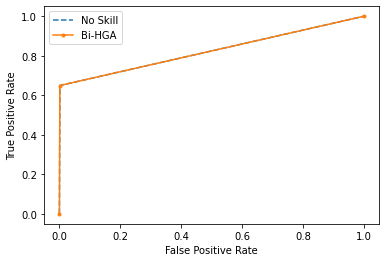

[0 0 0 ... 1 1 1]


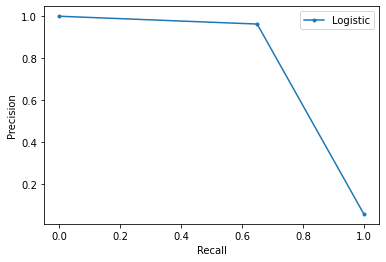

Epoch 1/20
180785/180785 [==============================] - 145s 804us/step - loss: 0.0592 - accuracy: 0.9777 - val_loss: 0.0563 - val_accuracy: 0.9814
Epoch 2/20
180785/180785 [==============================] - 148s 819us/step - loss: 0.0590 - accuracy: 0.9780 - val_loss: 0.0564 - val_accuracy: 0.9776
Epoch 3/20
180785/180785 [==============================] - 146s 809us/step - loss: 0.0590 - accuracy: 0.9780 - val_loss: 0.0553 - val_accuracy: 0.9784
Epoch 4/20
180785/180785 [==============================] - 152s 843us/step - loss: 0.0588 - accuracy: 0.9780 - val_loss: 0.0612 - val_accuracy: 0.9778
Epoch 5/20
180785/180785 [==============================] - 149s 824us/step - loss: 0.0586 - accuracy: 0.9780 - val_loss: 0.0556 - val_accuracy: 0.9784
Epoch 6/20
180785/180785 [==============================] - 153s 848us/step - loss: 0.0586 - accuracy: 0.9781 - val_loss: 0.0550 - val_accuracy: 0.9778
Epoch 7/20
180785/180785 [==============================] - 147s 812us/step - loss: 0.05

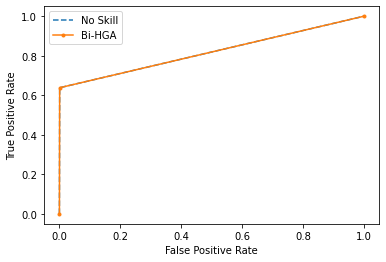

[0 0 0 ... 1 1 1]


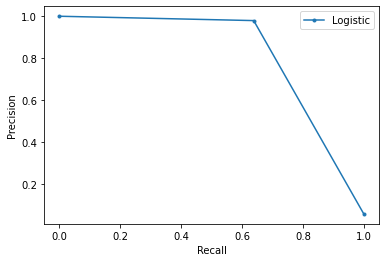

Epoch 1/20
180785/180785 [==============================] - 149s 822us/step - loss: 0.0500 - accuracy: 0.9796 - val_loss: 0.0458 - val_accuracy: 0.9795
Epoch 2/20
180785/180785 [==============================] - 148s 817us/step - loss: 0.0497 - accuracy: 0.9797 - val_loss: 0.0515 - val_accuracy: 0.9790
Epoch 3/20
180785/180785 [==============================] - 147s 811us/step - loss: 0.0494 - accuracy: 0.9798 - val_loss: 0.0449 - val_accuracy: 0.9797
Epoch 4/20
180785/180785 [==============================] - 148s 821us/step - loss: 0.0491 - accuracy: 0.9799 - val_loss: 0.0466 - val_accuracy: 0.9792
Epoch 5/20
180785/180785 [==============================] - 153s 845us/step - loss: 0.0489 - accuracy: 0.9800 - val_loss: 0.0445 - val_accuracy: 0.9803
Epoch 6/20
180785/180785 [==============================] - 149s 822us/step - loss: 0.0487 - accuracy: 0.9800 - val_loss: 0.0457 - val_accuracy: 0.9801
Epoch 7/20
180785/180785 [==============================] - 148s 819us/step - loss: 0.04

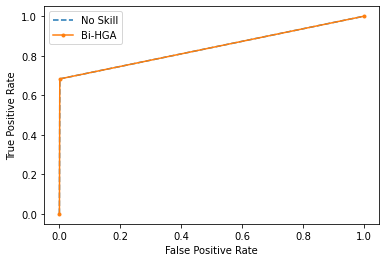

[0 0 0 ... 1 1 1]


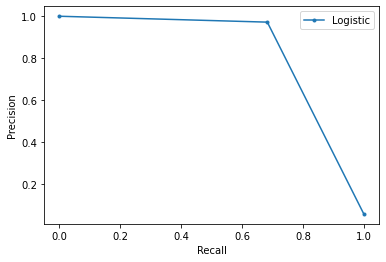

Epoch 1/20
180785/180785 [==============================] - 145s 800us/step - loss: 0.0464 - accuracy: 0.9806 - val_loss: 0.0423 - val_accuracy: 0.9808
Epoch 2/20
180785/180785 [==============================] - 146s 805us/step - loss: 0.0463 - accuracy: 0.9808 - val_loss: 0.0421 - val_accuracy: 0.9820
Epoch 3/20
180785/180785 [==============================] - 148s 818us/step - loss: 0.0462 - accuracy: 0.9808 - val_loss: 0.0488 - val_accuracy: 0.9795
Epoch 4/20
180785/180785 [==============================] - 149s 823us/step - loss: 0.0462 - accuracy: 0.9807 - val_loss: 0.0595 - val_accuracy: 0.9787
Epoch 5/20
180785/180785 [==============================] - 145s 803us/step - loss: 0.0461 - accuracy: 0.9808 - val_loss: 0.0452 - val_accuracy: 0.9795
Epoch 6/20
180785/180785 [==============================] - 149s 826us/step - loss: 0.0460 - accuracy: 0.9808 - val_loss: 0.0454 - val_accuracy: 0.9838
Epoch 7/20
180785/180785 [==============================] - 148s 820us/step - loss: 0.04

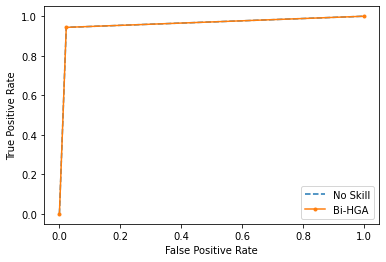

[0 0 0 ... 1 1 1]


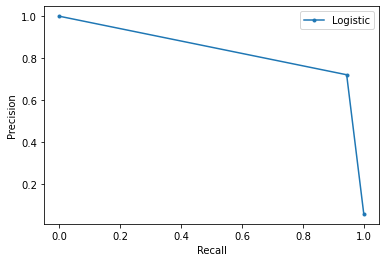

Cross Validation ROC - AUC = 0.8610870534356294
Cross Validation Precision recall curve - AUC = 0.6643942651932013
Cross Validation accuracy = 0.9782277710109623
Cross Validation f1 = 0.7921304605422779
Cross Validation precision = 0.9087907144715679
Cross Validation recall = 0.728684797840613
Cross Validation fpr = [0.         0.00651069 1.        ]
Cross Validation tpr = [0.        0.7286848 1.       ]
Cross Validation lr_precision = [0.05772269 0.90879071 1.        ]
Cross Validation lr_recall = [1.        0.7286848 0.       ]


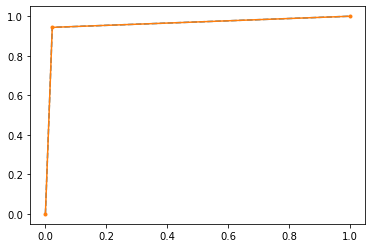

In [17]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from numpy import arange
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from matplotlib import pyplot 
from importlib import reload
reload(plt)
#from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc


kf = KFold(n_splits=4,shuffle=True,random_state=None)

scores = []
aucs=0
aucs1=0
f1s=0
recalls=0
precisions=0
accuracys=0
lr_precisions=0
lr_recalls=0
fprs=0
tprs=0

for train_index, test_index in kf.split(X):
    x_train, x_val = X[train_index], X[test_index]
    y_train, y_val = y[train_index], y[test_index]
    
    model.fit(x_train, y_train, epochs=20, batch_size=10, validation_data=(x_val, y_val))
    
    # make probability predictions with the model
    predictions = model.predict(x_val)
    # round predictions 
    predictions = [round(x[0]) for x in predictions]
    
   
    # make class predictions with the model
   # predictions1 =  model.predict>0.5.astype('int32')
    
    # evaluate the keras model
    _, accuracy = model.evaluate(X, y)
    print('overall Accuracy: %.2f' % (accuracy*100))
    
    print(confusion_matrix(y_val,predictions,labels=[1,0]))
    
    #No need for threshold setting since getting same value   
    accuracy=accuracy_score(y_val,predictions)
    print('accuracy: %f' % accuracy)
    
    f1=f1_score(y_val,predictions)
    print('f1 score: %f' % f1)    
    
    precision=precision_score(y_val,predictions)
    print('precision score: %f' % precision)
    
    recall=recall_score(y_val,predictions)
    print('recall score: %f' % recall)
    
    auc = roc_auc_score(y_val, predictions)
    print('ROC AUC: %f' % auc)    
    
    ns_auc = roc_auc_score(y_val, predictions)
    print('ROC AUC: %f' % auc)  
    
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    
    #https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/#:~:text=with%20sample%20code).-,ROC%20Curves%20and%20AUC%20in%20Python,probabilities%20for%20the%201%20class.
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_val, predictions)
    fpr, tpr, _ = roc_curve(y_val, predictions)
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(fpr, tpr, marker='.', label='Bi-HGA')

    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()

    print(y_val)
    #https://www.kaggle.com/vedbharti/classification-precision-recall-vs-roc-plot
    auc1=average_precision_score(y_val, predictions)
     
    lr_precision, lr_recall, _ = precision_recall_curve(y_val, predictions)
    #lr_f1, lr_auc = f1_score(y_val, predictions1), auc(lr_recall, lr_precision)
    # summarize scores
    #print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
    # plot the precision-recall curves
    #no_skill = len(testy[testy==1]) / len(testy)
    #pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    pyplot.plot(lr_recall, lr_precision, marker='.', label='Bi-HGA')
    # axis labels
    pyplot.xlabel('Recall')
    pyplot.ylabel('Precision')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()
    
    aucs += auc
    aucs1 += auc1
    accuracys += accuracy
    f1s += f1
    precisions += precision
    recalls += recall
    ns_fpr+=ns_fpr
    ns_tpr+=ns_tpr
    fprs+=fpr
    tprs+=tpr
    lr_recalls+=lr_recall
    lr_precisions+=lr_precision
print("Cross Validation ROC - AUC = {}".format(aucs/4))
print("Cross Validation Precision recall curve - AUC = {}".format(aucs1/4))
print("Cross Validation accuracy = {}".format(accuracys/4))
print("Cross Validation f1 = {}".format(f1s/4))
print("Cross Validation precision = {}".format(precisions/4))
print("Cross Validation recall = {}".format(recalls/4))
print("Cross Validation fpr = {}".format(fprs/4))
print("Cross Validation tpr = {}".format(tprs/4))
print("Cross Validation lr_precision = {}".format(lr_precisions/4))
print("Cross Validation lr_recall = {}".format(lr_recalls/4))

ns_fpr, ns_tpr, _ = roc_curve(y_val, predictions)
fpr, tpr, _ = roc_curve(y_val, predictions)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Bi-HGA')


In [18]:
end = datetime.datetime.now()

diff = (end - start)

datetime.timedelta(seconds=10, microseconds=885206)

diff_seconds = int(diff.total_seconds())

minute_seconds, seconds = divmod(diff_seconds, 60)
hours, minutes = divmod(minute_seconds, 60)
hms = f"{hours}h {minutes}m {seconds}s"

'0h 0m 10s'
print(hms) 

3h 23m 20s


In [ ]:
#https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/#:~:text=Optimal%20Threshold%20for%20Precision%2DRecall%20Curve,-Unlike%20the%20ROC&text=Recall%20is%20calculated%20as%20the,positives%20and%20the%20false%20negatives.
#Optimal Threshold Tuning
# search thresholds for imbalanced classification
from numpy import arange
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix 
# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')
 
# predict probabilities
#yhat = model.predict_proba(x_val)
# keep probabilities for the positive outcome only
#probs = yhat[:, 1]
# define thresholds
thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_val, to_labels(yhat_probs, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

In [ ]:
# evaluate each threshold
scores = [accuracy_score(y_val, to_labels(yhat_probs, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, Accuracy-Score=%.5f' % (thresholds[ix], scores[ix]))

In [ ]:
# evaluate each threshold
scores = [precision_score(y_val, to_labels(yhat_probs, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, Precision-Score=%.5f' % (thresholds[ix], scores[ix]))

In [ ]:
# evaluate each threshold
scores = [recall_score(y_val, to_labels(yhat_probs, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, recall-Score=%.5f' % (thresholds[ix], scores[ix]))

In [ ]:
from sklearn.metrics import roc_auc_score
# ROC AUC
auc = roc_auc_score(y_val, yhat_probs)
print('ROC AUC: %f' % auc)